In [1]:
import struct
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import math
from sklearn.datasets import make_blobs
from tqdm import tqdm #barre de progression taquadoum

import numpy as np
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [4]:
file1='t10k-images.idx3-ubyte'
file2='t10k-labels.idx1-ubyte'
file3='train-images.idx3-ubyte'
file4='train-labels.idx1-ubyte'

def read_idx(filename):
    '''Reads an idx file and returns an ndarray'''
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

### charger la liste de matrices, (liste d'images)

In [5]:
# y_train = y_train.reshape((y_train.shape[0], 1))
# # y_test = y_test.reshape((y_test.shape[0], 1))


In [6]:
# x_train_copy=x_train
# y_train_copy=y_train

(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)

3


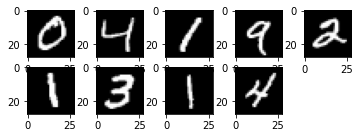

In [9]:
# x_train,y_train,x_test,y_test=read_idx(file3),read_idx(file4),read_idx(file1),read_idx(file2)

# print(x_train.shape)
# print(y_train.shape)
# print()
# print(x_test.shape)
# print(y_test.shape)
# print()
# print(y_train[10])

# for i in range(1, 10):
#     plt.subplot(4, 5, i)
#     plt.imshow(x_train[i], cmap='gray')
    
# for i in range(1, 10):
#     plt.subplot(4, 5, i)
#     plt.imshow(x_test[i], cmap='gray')





In [11]:
# def preprocessing(arr3d_array):
#     arr2d_array=arr3d_array.reshape(arr3d_array.shape[0],arr3d_array.shape[1]*arr3d_array.shape[2])
#     arr2d_array = normalize(arr2d_array)
#     return arr2d_array
  
def preprocessing(arr3d_array):
    arr2d_array=arr3d_array.reshape(arr3d_array.shape[0],arr3d_array.shape[1]*arr3d_array.shape[2])
    arr2d_array = (arr2d_array - arr2d_array.min())/ (arr2d_array.max() - arr2d_array.min())
    return arr2d_array
    

In [12]:
def preprocessing_label(vector):
    matrice = np.zeros((vector.size, 10))
    matrice[np.arange(vector.size), vector] = 1
    return matrice
    
    

### Apperçu dans un graphe 

(60000, 784) (60000, 1)
dimensions de X: (60000, 784)
dimensions de y: (60000, 1)


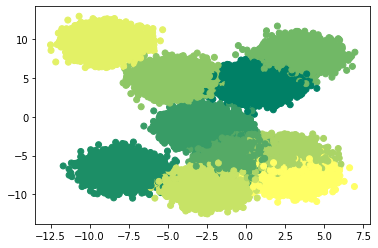

In [13]:
X, y = make_blobs(n_samples=60000, n_features=28*28, centers=10, random_state=0)
y = y.reshape((y.shape[0], 1))

print(X.shape,y.shape)
print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# Defining FFNN components

In [14]:
def weights_matrice(m,n):
    matrix=np.random.standard_normal((m,n))
    sqrt=math.sqrt(n)
    scalaire=1/sqrt
    matrix=scalaire*matrix
    return matrix
    
    

In [16]:
def sigmoide(z_i):
    return 1/(1+np.exp(-z_i))

In [17]:
# normaliser poids
def softmax(array):
    return (np.exp(array - array.max()))/np.sum(np.exp(array - array.max()))


In [34]:
def derive_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

def dsigmoid(x):
    return np.multiply(sigmoide(x),(1.0 - sigmoide(x)))

In [35]:

def forward_pass_one_image(vectors,w_1_,w_2_,w_3_):
    # On introduit les variables de x_train de la i-ème image à la première couche de neurones
    # 1. aggrégation
    #shape of vector (784,)
    #shape of w1: (784, 128)
    #Le produit d’une matrice de taille n x m par une matrice m x p donne une matrice n x p.
    vector2 = vectors.reshape((1, vectors.shape[0])) #new shape of vector: (1,784) -> turned to a mtrix avec 1 lignes et 784 variables
    z1= vector2.dot(w_1_) # shape of z1:(1,128)
    # 2. activation
    #shape of z1 : (1,128)
    a1= sigmoide(z1) #shape de a1 : (1, 128)
    # On fait paser les sorties à la seconde couche de neurones
    #shape of w2 : (128,64)
    #shape of a1: (1,128)
    z2=a1.dot(w_2_) # shape of z2 : (1, 64)
    a2=sigmoide(z2) # (1, 64)
    #shape of w3 : (64,10)
    #shape of a2 : (1,64)
    z3=a2.dot(w_3_) # -> z3 : (1, 10)
    a3=softmax(z3) # -> a3 :(1,10)
    return (vector2,z1,z2,z3,a1,a2,a3)

    

In [ ]:
def compute_error_Log_Loss(A,y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

# pour train avec itération sur les images
def compute_error_vector(x_testss,y_testss,updated_w1,updated_w2,updated_w3):
    error_total=np.empty([0,x_testss.shape[0]],dtype=float)
    for i in range(0,x_testss.shape[0]):
        vector___,z1___,z2___,z3___,a1___,a2___,a___3=forward_pass_one_image(x_testss[i],updated_w1,updated_w2,updated_w3)
        print('y_testss['+str(i)+']'+' without reshape')
        print(y_testss[i].shape)
        y_reshaped=y_testss[i].reshape((1,y_testss[i].shape[0]))
        print('y_testss['+str(i)+']'+' with reshape')
        print(y_reshaped.shape)
        print(y_reshaped)
        print('indice y')
        indice_max_y=np.argmax(y_reshaped,axis=1)
        print(indice_max_y)
        print(indice_max_y.shape)
        print('a3['+str(i)+']')
        print(a___3)
        print(a___3.shape)
        print('indice max_a')
        indice_max_a=np.argmax(a___3,axis=1)
        print(indice_max_a.shape)
        print(indice_max_a)
        error=1-np.mean(indice_max_a==indice_max_y)
        print('error image['+str(i)+']')
        print(error)
        error_total=np.append(error_total,error)
        print('total error (error_total)==mean_total_error')
        print(error_total)
   
    return np.mean(error_total)





In [38]:

    
    
def backpropagation_one_image(vector,z_1,z_2,a_3,a_2,a_1,y_input,w1s,w2s,w3s):
    e3=a_3-y_input# shape of a3 : (10,) shape of y : (10,) -> shape of e3 : (1, 10)
    e2=np.multiply(e3.dot(w3s.T),dsigmoid(z_2)) # shape e2 : (1, 64)
    e1=np.multiply(e2.dot(w2s.T),dsigmoid(z_1)) # shape e1 : (1, 128)
    delta_w3=a_2.T.dot(e3) # shape :(64,10)
    delta_w2=a_1.T.dot(e2) # shape : (128, 64)
    delta_w1=vector.T.dot(e1)  #shape: (784, 128)
    return(delta_w3,delta_w2,delta_w1)
    

    
    
    
    
    

In [39]:
def update(dw1, dw2,dw3,w_1__,w_2__,w_3__, lambd):
    w_1_new = w_1__ - lambd*dw1
    w_2_new = w_2__ - np.multiply(lambd,dw2)
    w_3_new = w_3__ - np.multiply(lambd,dw3)

    return (w_1_new,w_2_new,w_3_new)



In [40]:
def intialisation(m,n,p,c):
    poids1=weights_matrice(m,n) # W1 contient autant de paramètres que ce qu'il y de variables dans X_train
    poids2=weights_matrice(n,p)
    poids3=weights_matrice(p,c)
    return (poids1,poids2,poids3)

In [ ]:
#iteration image par image, forward_pass_one_image,backpropagation_one_image et compute_error_vectors
def train(tests_x,tests_y,matrice, y, learning_rate = 0.1, epochs = 80):
    matrice=preprocessing(matrice)
    y=preprocessing_label(y)
    tests_x=preprocessing(tests_x)
    tests_y=preprocessing_label(tests_y)
    w1,w2,w3=intialisation(784,128,64,10)
    for i in range(epochs):
        for j in range(0,matrice.shape[0]):
            vector,z1,z2,z3,a1,a2,a3=forward_pass_one_image(matrice[j],w1,w2,w3)
            delta_w3s,delta_w2s,delta_w1s=backpropagation_one_image(vector,z1,z2,a3,a2,a1,y[j],w1,w2,w3)
            w1_updated,w2_updated,w3_updated=update(delta_w1s, delta_w2s,delta_w3s,w1,w2,w3, learning_rate)
            w1,w2,w3=w1_updated,w2_updated,w3_updated
        mean_total_error=compute_error_vector(tests_x,tests_y,w1_updated,w2_updated,w3_updated)
        print('epoch: ' + str(i) + ' error rate: ' + str(mean_total_error)+'\n')
    return (w1_updated,w2_updated,w3_updated)

        


In [ ]:
x_train,y_train,x_test,y_test=read_idx(file3),read_idx(file4),read_idx(file1),read_idx(file2)

In [43]:
# train(x_train_copy, y_train_copy)
# you get better results if you pass in fewer images and use bigger epochs on them

#you get better results if you train on only a set of 5 images, learning rate of 0.01 and epochs = 60
# train_all_images(x_train_copy[0:5], y_train_copy[0:5])


#efficient result on five images if you cut into 2 batches and a learing rate of 0.01 and less than 30 epochs
# train_sets(x_train_copy[0:5], y_train_copy[0:5])

#efficient result on five images if you cut into 2 batches and a learing rate of 0.01 and less than 30 epochs
train(x_test[0:5],y_test[0:5],x_train, y_train)

y_testss[0] without reshape
(10,)
y_testss[0] with reshape
(1, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
indice y
[7]
(1,)
a3[0]
[[4.21770025e-05 1.25524179e-04 1.33440422e-04 3.16353762e-05
  6.88806159e-07 5.95222307e-05 9.17599099e-09 9.99101789e-01
  4.12634151e-06 5.01087578e-04]]
(1, 10)
indice max_a
(1,)
[7]
error image[0]
0.0
total error (error_total)==mean_total_error
[0.]
y_testss[1] without reshape
(10,)
y_testss[1] with reshape
(1, 10)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
indice y
[2]
(1,)
a3[1]
[[1.03974954e-03 3.30842797e-03 9.85089053e-01 5.78525717e-03
  4.13797993e-05 1.18307412e-03 1.25381992e-03 1.88689302e-04
  2.10418829e-03 6.36101597e-06]]
(1, 10)
indice max_a
(1,)
[2]
error image[1]
0.0
total error (error_total)==mean_total_error
[0. 0.]
y_testss[2] without reshape
(10,)
y_testss[2] with reshape
(1, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
indice y
[1]
(1,)
a3[2]
[[1.68125196e-07 9.99327856e-01 1.86520724e-05 1.12108896e-05
  4.45062109e-04 1.34841858e-05 3.19894572e-06 4

KeyboardInterrupt: 

In [2]:
6.29145982e-07
4.65610305e-09

0.006055548098986515